In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os

In [10]:
current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")

The current working directory is: C:\Users\Bhaswati


In [6]:
 df = pd.read_csv('Desktop/Internships/CodeAlpha/Bangalore.csv')

In [13]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [14]:
#  Top 10 Locations by Average Housing Price

In [16]:
top_locations = df.groupby('Location')['Price'].mean().nlargest(10).reset_index()
print(top_locations)

                   Location         Price
0             Richmond Town  6.235579e+07
1  Bannerghatta Road Jigani  5.800000e+07
2                   Kalkere  5.550000e+07
3              Basavanagudi  5.066000e+07
4          JP Nagar Phase 6  4.141111e+07
5        Hurulichikanahalli  3.820000e+07
6          Kaval Byrasandra  3.800000e+07
7                    Hebbal  3.208007e+07
8                       RMV  3.136667e+07
9      BTM Layout 2nd Stage  2.900000e+07


In [39]:
# --- Calculate KPIs ---
total_properties = df.shape[0]
average_price = df['Price'].mean()
average_area = df['Area'].mean()
resale_properties_count = df['Resale'].sum() # 'Resale' is 1 for resale, 0 otherwise
new_properties_count = total_properties - resale_properties_count
percentage_resale = (resale_properties_count / total_properties) * 100

print(f"\n--- Key Performance Indicators ---")
print(f"Total Properties: {total_properties:,}")
print(f"Overall Average Price: ₹{average_price:,.2f}")
print(f"Overall Average Area: {average_area:,.2f} sq ft")
print(f"Number of Resale Properties: {resale_properties_count:,}")
print(f"Number of New Properties: {new_properties_count:,}")
print(f"Percentage of Resale Properties: {percentage_resale:.2f}%")


--- Key Performance Indicators ---
Total Properties: 6,207
Overall Average Price: ₹10,585,104.83
Overall Average Area: 1,526.09 sq ft
Number of Resale Properties: 489
Number of New Properties: 5,718
Percentage of Resale Properties: 7.88%


In [18]:
# Distribution of Housing Prices (Histogram)

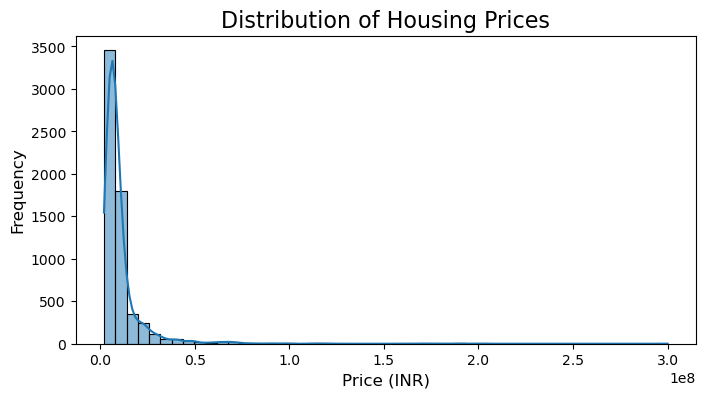

In [66]:
plt.figure(figsize=(8, 4)) # figure size 
sns.histplot(df['Price'], kde=True, bins=50) # Histogram with KDE and 50 bins
plt.title('Distribution of Housing Prices', fontsize=16) 
plt.xlabel('Price (INR)', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.savefig('price_distribution_histogram.png', dpi=300) 
plt.show()

In [22]:
# Scatter Plot: Housing Price vs. Area.

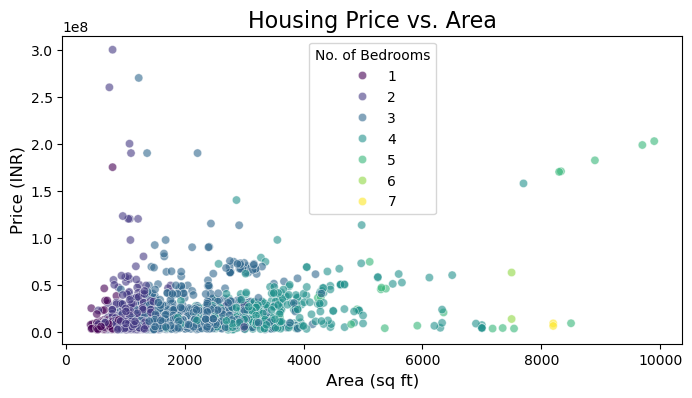

In [67]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Area'], y=df['Price'],hue=df['No. of Bedrooms'], palette='viridis', alpha=0.6) 
plt.title('Housing Price vs. Area', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=12) 
plt.ylabel('Price (INR)', fontsize=12) 
plt.savefig('price_vs_area_scatterplot.png', dpi=300)
plt.show()

In [26]:
# Box Plot: Housing Price by Number of Bedrooms

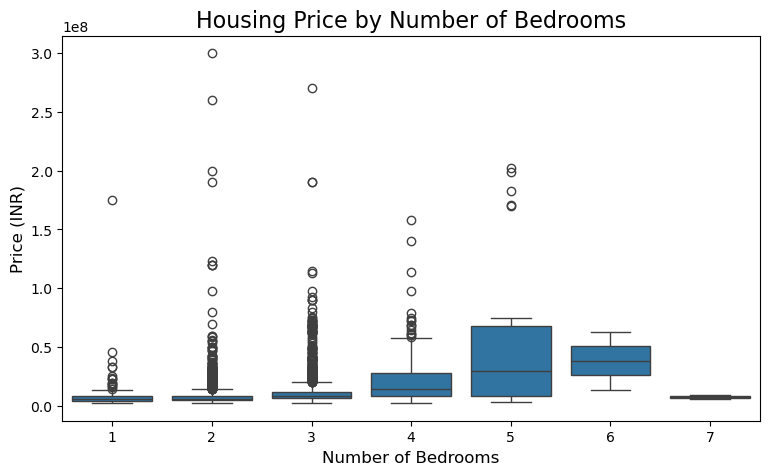

In [68]:
plt.figure(figsize=(9,5))
sns.boxplot(x=df['No. of Bedrooms'], y=df['Price'])
plt.title('Housing Price by Number of Bedrooms', fontsize=16) 
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12) 
plt.savefig('price_by_bedrooms_boxplot.png', dpi=300) 
plt.show() 

In [31]:
# Bar Chart: Top 10 Locations by Average Housing Price

In [32]:
top_locations = df.groupby('Location')['Price'].mean().nlargest(10).reset_index() # Group by 'Location', calculate the mean 'Price', get the top 10, and reset the index

In [33]:
# Creating the Bar Chart

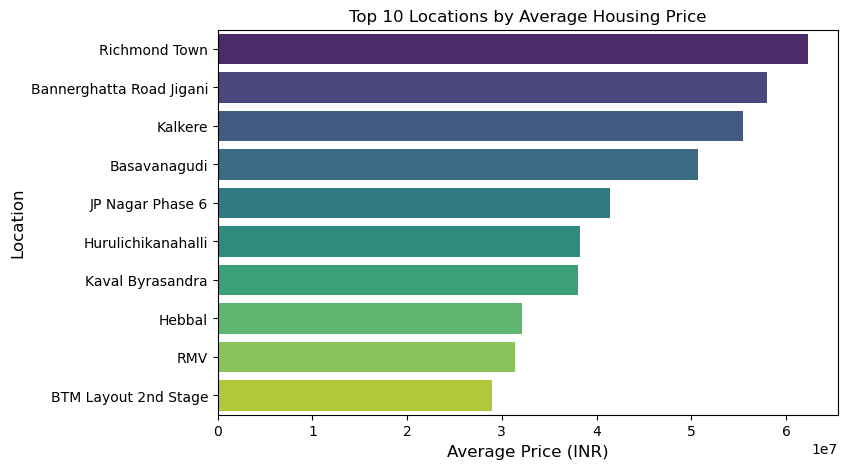

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_locations['Price'], y=top_locations['Location'], hue=top_locations['Location'],palette='viridis')
plt.title('Top 10 Locations by Average Housing Price', fontsize=12)
plt.xlabel('Average Price (INR)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.savefig('top_locations_by_price_barplot.png', dpi=300) 
plt.show() 

In [44]:
# Correlation Heatmap

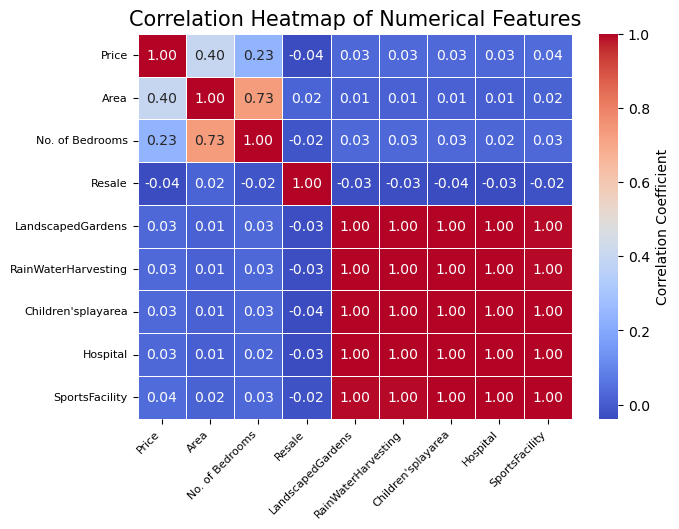

In [10]:
find_corr= ['Price','Area','No. of Bedrooms','Resale','LandscapedGardens','RainWaterHarvesting',"Children'splayarea",'Hospital','SportsFacility']
correlation_matrix = df[find_corr].corr()
plt.figure(figsize=(7,5))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Shows the correlation values on the heatmap cells
    cmap='coolwarm', # Color map
    fmt=".2f",       # Format annotations to 2 decimal places
    linewidths=.5,   # Add thin lines between cells for separation
    cbar_kws={'label': 'Correlation Coefficient'} # Label for the color bar
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=8) # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=8) # Keeping y-axis labels horizontal
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

In [43]:
# Average Price per Square Foot by Location

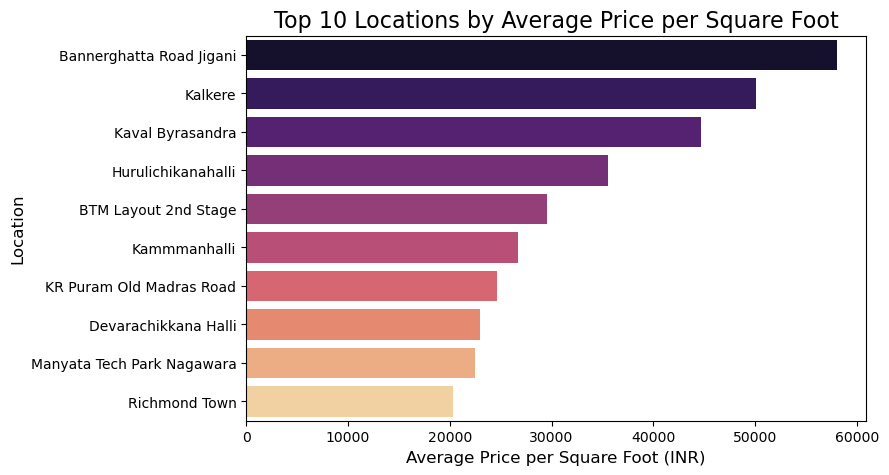

In [75]:
df_clean_area = df[df['Area'] > 0].copy()
df_clean_area['Price_Per_SqFt'] = df_clean_area['Price'] / df_clean_area['Area']
top_locations_by_sqft_price = df_clean_area.groupby('Location')['Price_Per_SqFt'].mean().nlargest(10).reset_index()

# Creating the Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_locations_by_sqft_price['Price_Per_SqFt'], y=top_locations_by_sqft_price['Location'],hue=top_locations_by_sqft_price['Location'], palette='magma')
plt.title('Top 10 Locations by Average Price per Square Foot', fontsize=16)
plt.xlabel('Average Price per Square Foot (INR)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.savefig('avg_price_per_sqft_by_location_barplot.png', dpi=300)
plt.show()


Loaded price_distribution_histogram.png
Loaded price_vs_area_scatterplot.png
Loaded price_by_bedrooms_boxplot.png
Loaded top_locations_by_price_barplot.png
Loaded correlation_heatmap.png
Loaded avg_price_per_sqft_by_location_barplot.png


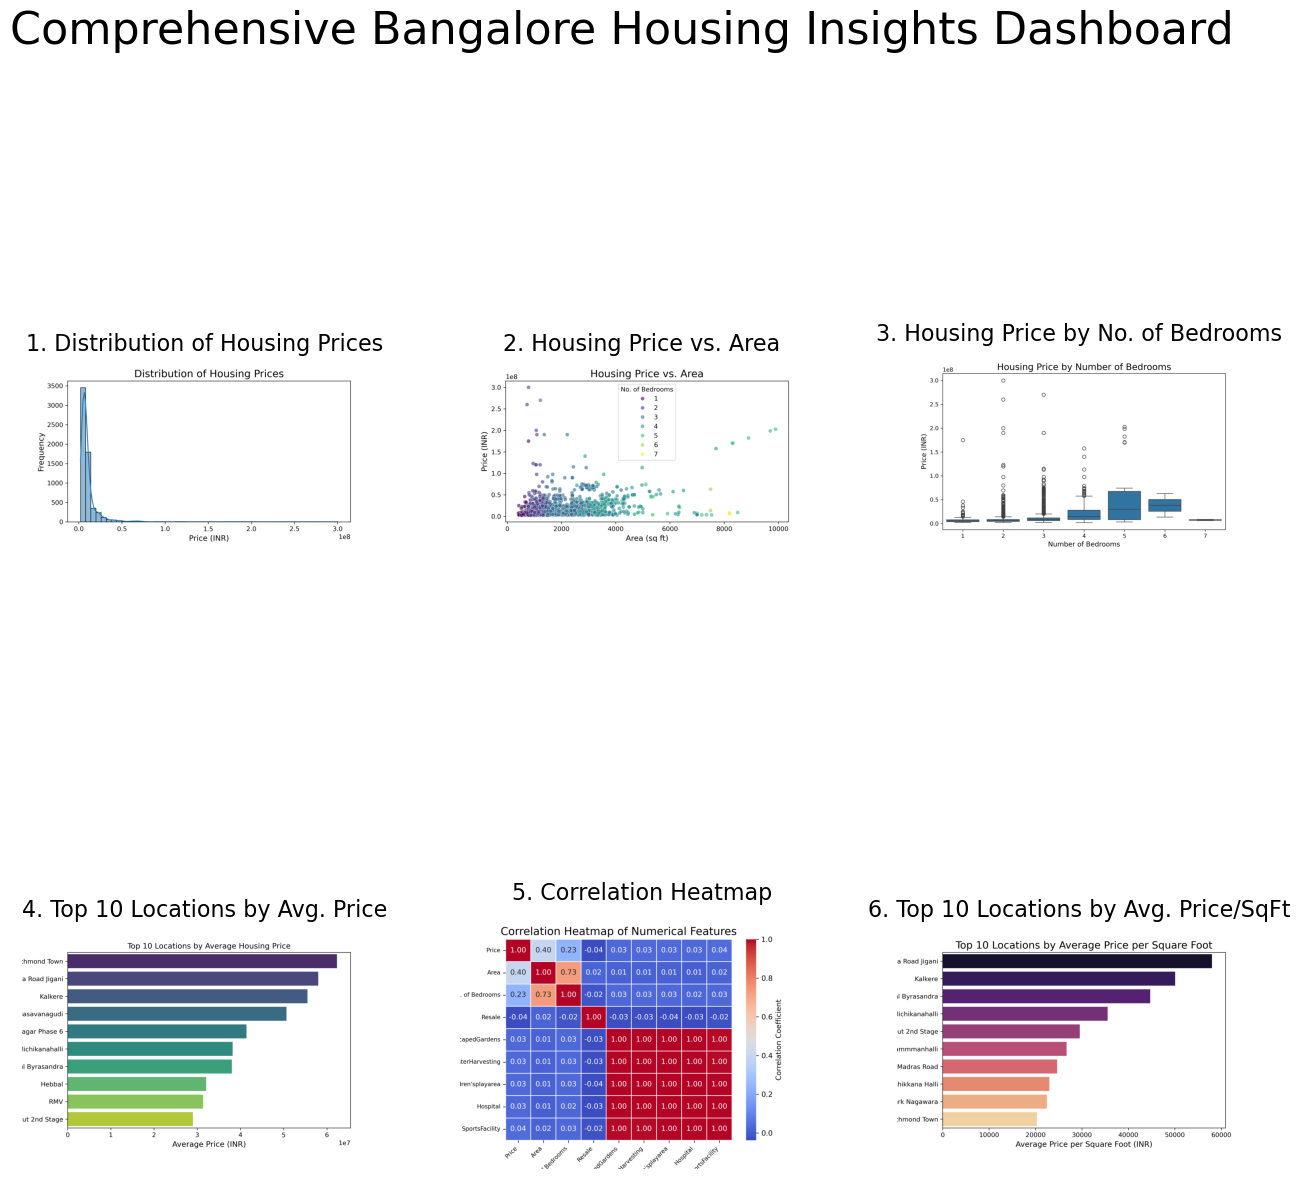

In [12]:
import matplotlib.image as mpimg

image_paths = {
    'hist': 'price_distribution_histogram.png',
    'scatter': 'price_vs_area_scatterplot.png',
    'boxplot_bedrooms': 'price_by_bedrooms_boxplot.png',
    'bar_top_locations': 'top_locations_by_price_barplot.png',
    'heatmap': 'correlation_heatmap.png',
    'bar_price_sqft': 'avg_price_per_sqft_by_location_barplot.png'}
loaded_images = {}
for key, path in image_paths.items():
    try:
        loaded_images[key] = mpimg.imread(path)
        print(f"Loaded {path}")
    except FileNotFoundError: 
        print(f"Error: Image file not found at {path}. Please check the path and filename.")
        exit()

fig, axes = plt.subplots(2, 3, figsize=(16,14))
fig.suptitle('Comprehensive Bangalore Housing Insights Dashboard', fontsize=32, y=1.02)

# Plot 1: Histogram
axes[0, 0].imshow(loaded_images['hist'])
axes[0, 0].set_title('1. Distribution of Housing Prices', fontsize=16)
axes[0, 0].axis('off')
# Plot 2: Scatter Plot
axes[0, 1].imshow(loaded_images['scatter'])
axes[0, 1].set_title('2. Housing Price vs. Area', fontsize=16)
axes[0, 1].axis('off')

# Plot 3: Box Plot (Bedrooms)
axes[0, 2].imshow(loaded_images['boxplot_bedrooms'])
axes[0, 2].set_title('3. Housing Price by No. of Bedrooms', fontsize=16)
axes[0, 2].axis('off')

# Plot 4: Top Locations Bar Chart
axes[1, 0].imshow(loaded_images['bar_top_locations'])
axes[1, 0].set_title('4. Top 10 Locations by Avg. Price', fontsize=16)
axes[1, 0].axis('off')

# Plot 5: Correlation Heatmap
axes[1, 1].imshow(loaded_images['heatmap'])
axes[1, 1].set_title('5. Correlation Heatmap', fontsize=16)
axes[1, 1].axis('off')

# Plot 6: Average Price per SqFt by Location Bar Chart
axes[1, 2].imshow(loaded_images['bar_price_sqft'])
axes[1, 2].set_title('6. Top 10 Locations by Avg. Price/SqFt', fontsize=16)
axes[1, 2].axis('off')

plt.savefig('compiled_housing_dashboard.png', dpi=300)
plt.show()